# Thư viện

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.colors import LogNorm

sns.set_style("darkgrid")

# Thu thập dữ liệu 

## Ngữ cảnh, câu chuyện mà nhóm sinh viên thực hiện việc tìm kiếm dữ liệu?

-   Khi nhóm muốn tìm một bộ phim hay mà không phải tốn quá nhiều thời gian để tìm kiếm phim cùng với những đánh giá, bình luận của người xem để nhóm so sánh xem nhóm sẽ xem phim nào.

## Dữ liệu mà nhóm sinh viên là về chủ đề gì và được lấy từ nguồn nào?

-   Nhóm đã thu thập và phân tích dataset về "phim và series được đánh giá cao nhất" được lấy từ Kaggle. Tuy nhiên, trong đồ án này nhóm đã quyết định chỉ xử lý và phân tích dữ liệu của các phim lẻ(Film).
-   Mỗi một dòng dữ liệu bao gồm: Name, Date, Rate, Votes, Genre, Duration, Type, Certificate, Episodes, Nudity, Violence, Profanity, Alcohol, Frightening. Ý nghĩa của mỗi cột sẽ được giải thích ở phần tiếp theo.

## Người ta có cho phép sử dụng dữ liệu như thế này hay không? Ví dụ: cần kiểm tra thử License của dữ liệu là gì?

-   Dữ liệu được cung cấp bởi người đăng tải (tạm gọi là tác giá) trên trang Kaggle. Dữ liệu này được nhóm thu thập tuân thủ giấy phép bản quyền CC0 1.0 Universal (CC0 1.0) Public Domain Dedication, cho phép người khác có quyển chia sẻ, sử dụng và xây dựng, thậm chí cho cả mục đích thương mại mà không cần tác giả cho phép, dựa trên tác phẩm mà tác giả tạo ra, trong trường hợp này là dữ liệu về các bộ phim và series được đánh giá cao nhất.

## Người ta đã thu thập dữ liệu này như thế nào? Phương pháp thực hiện là gì?

-   Dữ liệu này được tác giả lấy từ IMDB Website là một trang web phổ biến để đánh giá các bộ phim và chương trình truyền hình. 
-   Tác giả đã thu thập dữ liệu này bằng phương pháp Web Scraping từ trang web IMDB.

# Data preprocessing

In [3]:
df = pd.read_csv("../data/imdb.csv")
df.head()

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate


In [4]:
df.shape

(6178, 14)

Dữ liệu có 6178 dòng và 14 cột

**Giải thích ý nghĩa từng cột:**

- `Name`: Tên phim

- `Date`: Ngày phát hành

- `Rate`: Điểm imdb trung bình của phim

- `Votes`: Số lượng người đánh giá phim

- `Genre`: Thể loại phim

- `Duration`: Độ dài phim

- `Type`: Loại phim, gồm `Film` - Phim lẻ và `Series` - Phim bộ

- `Certificate`: Nhãn phim

- `Episodes`: Số lượng tập (chỉ đối với các dòng có `Type` là `Series`)

- `Nudity`: Mức độ các cảnh 'nóng' trong phim

- `Violence`: Mức độ các cảnh bạo lực trong phim

- `Profanity`: Mức độ cảc cảnh chửi rủa trong phim

- `Alcohol`: Mức độ các cảnh xuất hiện cồn trong phim

- `Frightening`: mức độ các cảnh gây sợ hãi trong phim

Các cột `Nudity, Violence, Profanity, Alcohol, Frightening` có chung bộ giá trị đánh giá mức độ gồm:

- `None`: Hầu như không có

- `Mild`: Nhẹ

- `Moderate`: Vừa phải

- `Severe`: Nặng

- `No Rate`: Không có đánh giá của người xem ở khía cạnh này

Trước khi tiến hành tiền xử lí dữ liệu, như đã đề cập trước ở phần `1. Data Collecting`, nhóm chỉ tiến hành xử lí và phân tích dữ liệu của các phim lẻ (`Film`), không phân tích dữ liệu các phim bộ (`Series`), do đó nhóm sẽ loại bỏ các dòng có giá trị `Series` của cột `Type`

In [5]:
df = df[df["Type"] == "Film"]

In [6]:
df["Episodes"].value_counts()

-    4446
Name: Episodes, dtype: int64

Sau khi chỉ giữ lại các `Film` thì ở cột `Episodes` chỉ số lượng tập của phim lúc này chỉ chứa giá trị '`-`'. Đồng thời lúc này cột `Type` cũng chỉ còn chứa giá trị `Film`, do đó nhóm sẽ xóa cột `Type` và `Episodes`

In [7]:
df.drop(["Episodes", "Type"], axis=1, inplace=True)

In [8]:
df.shape

(4446, 12)

Sau khi xóa các dòng `Series` và cột `Episodes`, dữ liệu còn lại 4446 dòng, 12 cột

## Missing value


In [9]:
df.isna().sum()

Name           0
Date           0
Rate           0
Votes          0
Genre          0
Duration       0
Certificate    0
Nudity         0
Violence       0
Profanity      0
Alcohol        0
Frightening    0
dtype: int64

Kiểm tra sơ bằng hàm `isna()`, không có ô dữ liệu nào bị thiếu (không có giá trị). Tuy nhiên khi quan sát dữ liệu, nhóm nhận thấy ở một số cột có các giá trị tượng trưng cho không có dữ liệu như `"None"`, `"No Rate"`

### Cột `Rate` và cột `Votes`



In [10]:
df["Rate"].value_counts().sort_index().index

Index(['1.2', '1.9', '2.0', '2.3', '2.4', '2.5', '2.7', '2.8', '2.9', '3.0',
       '3.1', '3.2', '3.3', '3.4', '3.5', '3.7', '3.8', '3.9', '4.0', '4.1',
       '4.2', '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5.0', '5.1',
       '5.2', '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6.0', '6.1',
       '6.2', '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8.0', '8.1',
       '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9.0', '9.2',
       '9.3', 'No Rate'],
      dtype='object')

In [11]:
df["Votes"].value_counts().sort_index().index

Index(['1,000', '1,015', '1,023', '1,031,650', '1,036,534', '1,044',
       '1,045,683', '1,047,410', '1,049,398', '1,054',
       ...
       '99,495', '99,578', '99,655', '99,665', '99,670', '99,760', '990,836',
       '993,069', '995', 'No Votes'],
      dtype='object', length=3439)

In [12]:
df[df["Rate"] == "No Rate"].equals(df[df["Votes"] == "No Votes"])

True

In [13]:
df[df["Rate"] == "No Rate"]["Rate"].count()

145

Kiểm tra hai cột `Rate` và `Votes`, nhóm nhận thấy cột `Rate` có giá trị `No Rate` tượng trưng cho giá trị rỗng, cột `Votes` có giá trị `No Votes` tượng trưng cho giá trị rỗng. Đồng thời các dòng có giá trị `No Rate` cũng chính là các dòng có giá trị `No Votes`. Do chỉ có 145 dòng này, nhóm quyết định xóa các dòng này khỏi dataframe

In [14]:
df = df[df["Rate"] != "No Rate"]

### Cột Duration

In [15]:
df["Duration"].value_counts().sort_index().index

Index(['100 ', '101 ', '102 ', '103 ', '104 ', '105 ', '106 ', '107 ', '108 ',
       '109 ',
       ...
       '91 ', '92 ', '93 ', '94 ', '95 ', '96 ', '97 ', '98 ', '99 ', 'None'],
      dtype='object', length=150)

In [16]:
df[df["Duration"] == "None"]

,Name,Date,Rate,Votes,Genre,Duration,Certificate,Nudity,Violence,Profanity,Alcohol,Frightening
241,Hotel Transylvania: Transformania,2022,6.9,316,"Animation, Adventure, Comedy",None,PG,None,Severe,Severe,Severe,Severe
1915,Unaired Game of Thrones Prequel Pilot,2019,6.6,90,Fantasy,None,None,No Rate,No Rate,No Rate,No Rate,No Rate
5008,My Struggle,2021,8.7,74,Biography,None,None,No Rate,No Rate,No Rate,No Rate,No Rate
6158,My Struggle,2021,8.7,74,Biography,None,None,No Rate,No Rate,No Rate,No Rate,No Rate


Cột `Duration` chỉ có 4 giá trị `None`. Nhóm quyết định xóa các dòng này

In [17]:
df = df[df["Duration"] != "None"]

### Cột Certificate

In [18]:
df["Certificate"].value_counts()

R            1873
PG-13        1132
PG            523
Not Rated     189
None          179
TV-MA         109
G              70
Approved       42
Unrated        40
TV-14          35
Passed         24
NC-17          14
TV-PG          13
E              12
(Banned)       10
TV-G           10
GP              6
X               6
TV-Y7           5
M               3
M/PG            2
Name: Certificate, dtype: int64

In [19]:
df[df["Certificate"] == "Not Rated"]

,Name,Date,Rate,Votes,Genre,Duration,Certificate,Nudity,Violence,Profanity,Alcohol,Frightening
237,Busanhaeng,2016,7.6,"190,528","Action, Horror, Thriller",118,Not Rated,None,Severe,Mild,None,Severe
266,Batoru rowaiaru,2000,7.6,"176,302","Action, Adventure, Drama",114,Not Rated,Mild,Severe,Mild,Mild,Severe
310,Black as Night,2021,3.9,"1,087","Drama, Horror, Thriller",87,Not Rated,None,Mild,Moderate,Moderate,Moderate
340,Rakka,2017,7.4,"7,037","Short, Horror, Sci-Fi",22,Not Rated,No Rate,Severe,Moderate,Mild,No Rate
351,The Manor,2021,5.3,"1,677",Horror,81,Not Rated,None,None,Mild,None,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...
6109,Anatomy of a Murder,1959,8.0,"63,564","Drama, Mystery",161,Not Rated,None,Mild,Mild,Mild,Mild
6149,Brawl in Cell Block 99,2017,7.2,"62,894","Action, Crime, Drama",132,Not Rated,Mild,Severe,Moderate,Mild,Severe
6154,Dalkomhan insaeng,2005,7.5,"38,677","Action, Crime, Drama",119,Not Rated,None,Severe,Severe,Mild,Moderate
6171,Chugyeokja,2008,7.8,"62,423","Action, Crime, Thriller",125,Not Rated,Mild,Severe,Moderate,Mild,Severe


Quan sát các dòng chứa giá trị `"Not Rated"` ở cột `"Certificate"`, nhóm nhận thấy ở các cột khác tương đối đủ giá trị, do đó nhóm quyết định giữ lại các dòng này, ý nghĩa của giá trị `"Not Rated"` sẽ được quyết định sau 

In [20]:
df[df["Certificate"] == "None"][["Nudity", "Violence", "Profanity", "Alcohol", "Frightening"]].value_counts()

Nudity   Violence  Profanity  Alcohol  Frightening
No Rate  No Rate   No Rate    No Rate  No Rate        179
dtype: int64

Quan sát các dòng chứa giá trị `"None"` ở cột `"Certificate"`, nhóm nhận thấy các cột đánh giá như `"Nudity"`, `"Violence"` đều mang giá trị `"No Rate"`. Do đó các dòng này có thể xem như dữ liệu khuyết của cột `"Certificate"`, nhóm quyết định xóa bỏ các dòng này

In [21]:
df = df[df["Certificate"] != "None"]

### Các cột đánh giá `"Nudity"`, `"Violence"`, `"Profanity"`, `"Alcohol"`, `"Frightening"`

In [22]:
df[(df["Nudity"] == "No Rate") 
   | (df["Violence"] == "No Rate") 
   | (df["Profanity"] == "No Rate") 
   | (df["Alcohol"] == "No Rate") 
   | (df["Frightening"] == "No Rate")
][
    ["Nudity", "Violence", "Profanity", "Alcohol", "Frightening"]
]

,Nudity,Violence,Profanity,Alcohol,Frightening
57,None,Severe,Severe,No Rate,Severe
194,No Rate,Moderate,Moderate,Mild,Moderate
223,No Rate,No Rate,No Rate,No Rate,No Rate
235,No Rate,No Rate,No Rate,No Rate,No Rate
340,No Rate,Severe,Moderate,Mild,No Rate
...,...,...,...,...,...
5785,No Rate,No Rate,No Rate,No Rate,No Rate
5798,Mild,Moderate,Mild,No Rate,Moderate
5959,No Rate,No Rate,No Rate,No Rate,No Rate
6078,No Rate,No Rate,No Rate,No Rate,No Rate


Các giá trị `"No Rate"` của các cột đánh giá thường xuất hiện cùng nhau. Sau khi thống nhất, nhóm quyết định xoá tất cả các dòng có giá trị `No Rate` ở 1 trong 5 cột này

In [23]:
df = df[~((df["Nudity"] == "No Rate") 
   | (df["Violence"] == "No Rate") 
   | (df["Profanity"] == "No Rate") 
   | (df["Alcohol"] == "No Rate") 
   | (df["Frightening"] == "No Rate"))
]

## Duplicated value

In [24]:
df[df.duplicated(keep = False)].sort_values("Name")

,Name,Date,Rate,Votes,Genre,Duration,Certificate,Nudity,Violence,Profanity,Alcohol,Frightening
5755,10,1979,6.1,"17,216","Comedy, Romance",122,R,Severe,None,Mild,Moderate,None
4605,10,1979,6.1,"17,216","Comedy, Romance",122,R,Severe,None,Mild,Moderate,None
4505,10 Years,2011,6.1,"25,016","Comedy, Drama, Romance",110,PG-13,Mild,None,Mild,Mild,None
5655,10 Years,2011,6.1,"25,016","Comedy, Drama, Romance",110,PG-13,Mild,None,Mild,Mild,None
4133,12 Strong,2018,6.6,"74,061","Action, Drama, History",130,R,None,Severe,Moderate,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...
4359,À bout de souffle,1960,7.8,"77,529","Crime, Drama",90,Not Rated,Mild,Mild,Moderate,Moderate,None
4799,À l'intérieur,2007,6.7,"39,232",Horror,82,R,None,Severe,Moderate,Mild,Severe
5949,À l'intérieur,2007,6.7,"39,232",Horror,82,R,None,Severe,Moderate,Mild,Severe
5955,Átame!,1989,7.0,"27,688","Comedy, Crime, Drama",101,NC-17,Moderate,Moderate,Moderate,Moderate,Mild


In [25]:
df.duplicated().sum()

775

Dữ liệu có 775 dòng bị trùng lắp, nhóm quyết định xóa các dòng này

In [26]:
df = df.drop_duplicates()

## Điều chỉnh kiểu dữ liệu của các cột

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3225 entries, 0 to 5027
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         3225 non-null   object
 1   Date         3225 non-null   int64 
 2   Rate         3225 non-null   object
 3   Votes        3225 non-null   object
 4   Genre        3225 non-null   object
 5   Duration     3225 non-null   object
 6   Certificate  3225 non-null   object
 7   Nudity       3225 non-null   object
 8   Violence     3225 non-null   object
 9   Profanity    3225 non-null   object
 10  Alcohol      3225 non-null   object
 11  Frightening  3225 non-null   object
dtypes: int64(1), object(11)
memory usage: 327.5+ KB


Nhóm nhận thấy một số cột có kiểu dữ liệu chưa phù hợp:

- `Rate`: object -> cần chuyển thành float

- `Votes`: object -> cần chuyển thành int64

- `Duration`: object -> cần chuyển thành int64

Ngoài ra còn cột `Date` biểu diễn năm phát hành của phim, hiện đang có kiểu dữ liệu int64. Do cột này chỉ chứa giá trị năm nên có thể để ở kiểu int64

In [28]:
df["Rate"] = df["Rate"].astype("float")

In [29]:
df["Votes"] = df["Votes"].str.replace(",","").astype("int64")

In [30]:
df["Duration"] = df["Duration"].astype("int")

## Outlier

### Các cột numerical

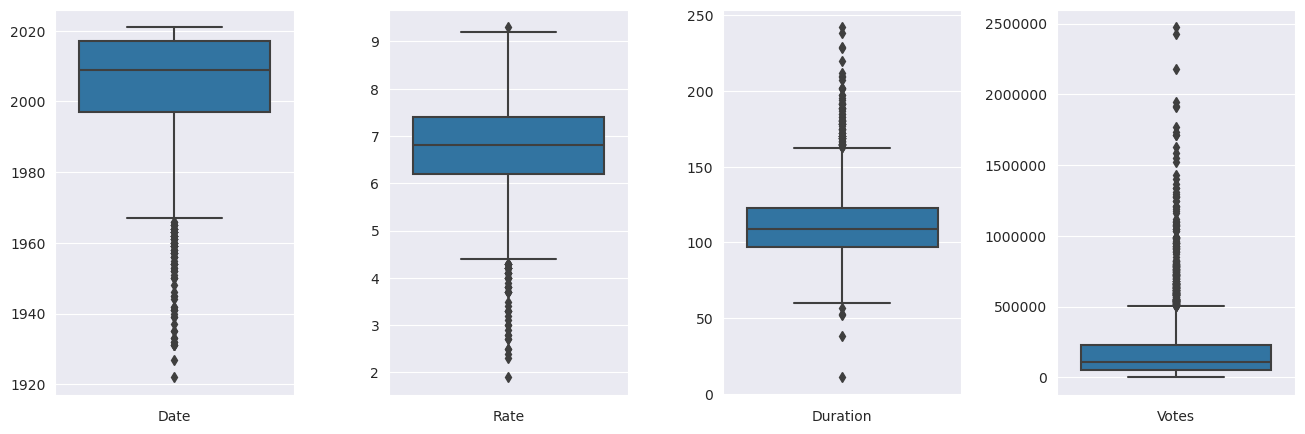

In [31]:
fig, axes = plt.subplots(ncols = 4, figsize = (16, 5))
fig.subplots_adjust(wspace = 0.4)



for ax, feature in zip(axes, ["Date", "Rate", "Duration", "Votes"]):
    sns.boxplot(df[feature], ax = ax)
    ax.set_xlabel(feature)
    ax.set_xticklabels([])

plt.ticklabel_format(style='plain', axis='y')

- Đối với cột `Date`, các giá trị ngoại lai chủ yếu rơi vào nhóm các phim cũ ra mắt khoảng trước năm 1970. Do các phim này ra mắt đã lâu, nhóm quyết định xóa bỏ các dòng này.

- Đối với cột `Rate`, các giá trị ngoại lai chủ yếu rơi vào nhóm các phim có rate thấp từ 2 tới 4 điểm. Tuy nhiên các giá trị ngoại lai này phân bố liên tục, nên nhóm sẽ giữ lại các giá trị này. Cùng lí do các giá trị ngoại lai phân bố liên tục, nhóm cũng sẽ giữ nguyên cột `Duration`.

- Đối với cột `Votes`, các giá trị ngoại lai chủ yếu rơi vào nhóm các phim có lượng vote cao. Tuy các giá trị này nằm rất xa so với phần lớn dữ liệu, nhưng các phim được càng nhiều vote thì càng được nhiều người quan tâm, do đó nhóm cũng sẽ giữ lại các giá trị này.

In [32]:
dateq = np.quantile(df["Date"], q = [0.25, 0.5, 0.75])
date_threshold = dateq[0] - 1.5 * (dateq[2] - dateq[0])
df = df[df["Date"] >= date_threshold]

### Các cột categorical

In [33]:
df["Genre"].value_counts()

Action, Adventure, Sci-Fi       113
Drama, Romance                  103
Animation, Adventure, Comedy     99
Drama                            92
Comedy, Drama, Romance           91
                               ... 
Action                            1
Biography, Drama, Musical         1
Animation, Drama, War             1
Action, Horror, War               1
Drama, Family, History            1
Name: Genre, Length: 285, dtype: int64

Cột `Genre` không chứa các giá trị đơn mà mỗi dòng có thể chứa hơn 1 giá trị về thể loại của phim (vì một phim có thể thuộc đồng thời nhiều thể loại). Do đó cột này có tới 285 nhãn khác biệt, nhóm sẽ không can thiệp vào cột này

Text(0, 0.5, 'Count')

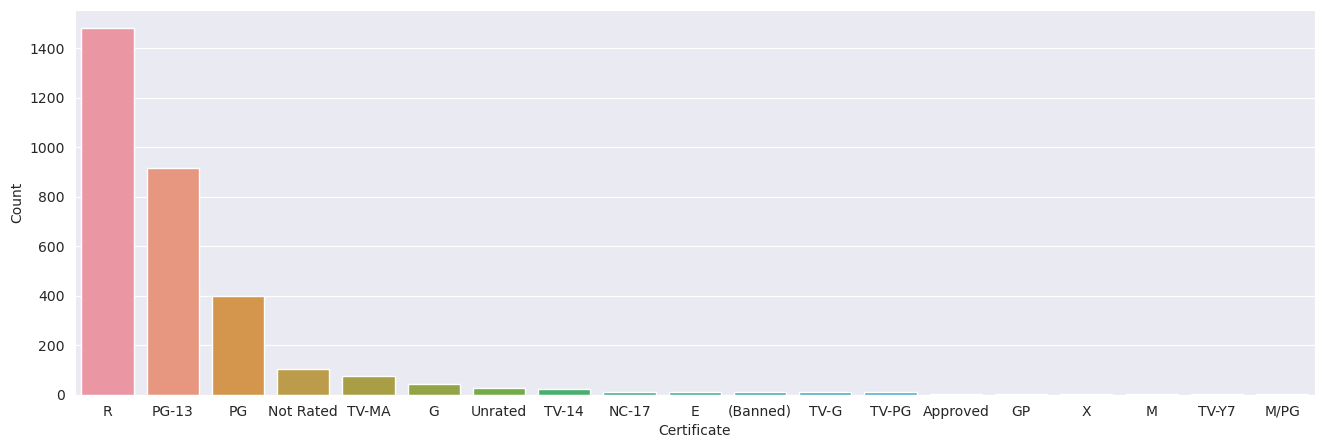

In [34]:
plt.figure(figsize = (16, 5))
ax = sns.barplot(df["Certificate"].value_counts().reset_index(), x = "index", y = "Certificate")
ax.set_xlabel("Certificate")
ax.set_ylabel("Count")

Cột `Certificate` có khá nhiều giá trị ngoại lai, tuy nhiên ý nghĩa của các giá trị trong cột này sẽ được xử lí ở phần sau, tạm thời nhóm chưa can thiệp vào cột này

(0.0, 1.0, 0.0, 1.0)

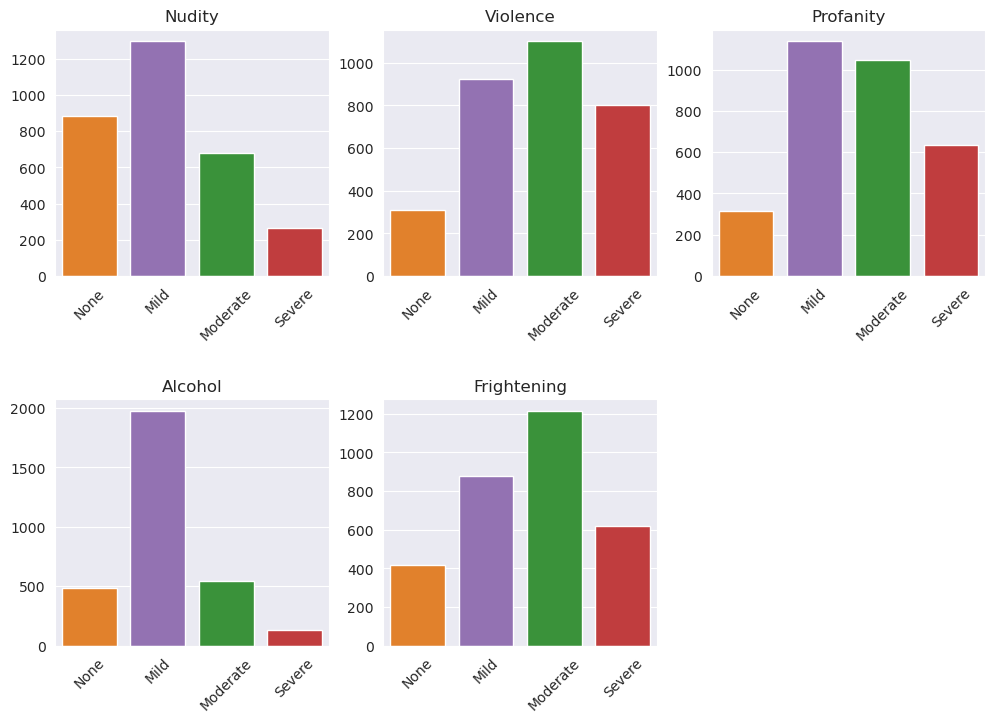

In [35]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 8))
fig.subplots_adjust(hspace = 0.5)

palette = {
    "No Rate" : "C0",
    "None": "C1",
    "Moderate": "C2",
    "Severe": "C3",
    "Mild": "C4"
}

stat = ["Nudity", "Violence", "Profanity", "Alcohol", "Frightening"]
level = ["None", "Mild", "Moderate", "Severe"]

for ax, feature in zip(axes.flatten(), stat):
    sns.barplot(df[feature].value_counts().loc[level].reset_index(), x = "index", y = feature, ax = ax, palette = palette)
    ax.set_title(feature)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

axes[-1, -1].axis("off")

Các cột đánh giá các yếu tố `Nudity`, `Violence`, `Profanity`, `Alcohol`, `Frightening` không có giá trị ngoại lai

## Khảo sát sâu hơn cột `Certificate`

In [36]:
df["Certificate"].value_counts()

R            1481
PG-13         914
PG            398
Not Rated     105
TV-MA          76
G              43
Unrated        26
TV-14          22
NC-17          12
E              10
(Banned)       10
TV-G            9
TV-PG           9
Approved        4
GP              3
X               3
M               2
TV-Y7           1
M/PG            1
Name: Certificate, dtype: int64

Giải thích các giá trị của cột "Certificate"

- `"R"`: Thanh thiếu niên dưới 18 tuổi không được xem phim nếu không có sự đồng ý của người lớn.

- `"PG-13"`: Phim có một số chi tiết không phù hợp với trẻ từ 13 tuổi trở xuống

- `"PG"`: Phim có thể có một số chi tiết (hình ảnh, từ ngữ) không phù hợp với trẻ nhỏ. Bố mẹ cần cân nhắc khi cho con cái xem phim.

- `"Not Rated"`:  Chưa được kiểm duyệt, thường bởi vì có những cảnh nóng/bạo lực ở mức cao

- `"TV-MA"`: Không phù hợp với thanh thiếu niên dưới 18 tuổi

- `"G"`: Phù hợp với mọi lứa tuổi 

- `"Unrated"`: Chưa được kiểm duyệt, thường bởi vì có những cảnh nóng/bạo lực ở mức cao

- `"TV-14"`: Phim có một số chi tiết không phù hợp với trẻ dưới 14 tuổi.

- `"NC-17"`: Không phù hợp với thanh thiếu niên dưới 18 tuổi

- `"E"`: Không rõ

- `"(Banned)"`: Phim bị cấm chiếu (bởi các lí do chính trị, tiêu chuẩn đạo đức,...)

- `"TV-G"`: Phù hợp với mọi lứa tuổi 

- `"TV-PG"`: Bố mẹ cần cân nhắc khi cho con cái xem phim.

- `"Approved"`: Không rõ

- `"GP"`: Sai chỉnh tả của `"PG"`

- `"X"`: Không phù hợp với thanh thiếu niên dưới 18 tuổi

- `"M"`: Phim có một số chi tiết không phù hợp với trẻ dưới 14 tuổi

- `"TV-Y7"`: Không phù hợp với trẻ em dưới 7 tuổi

- `"M/PG"`: Phim có một số chi tiết không phù hợp với trẻ dưới 14 tuổi.

Do sự khác biệt trong thang đánh giá phim ở các nước nên cột `Certificate` có khá nhiều giá trị mang ý nghĩa tương tự nhau, nhưng nhìn chung các nhãn phim ở trên có thể chia thành các nhóm sau:

- Phù hợp cho mọi lứa tuổi, gồm: `"G"`, `"TV-G"`

- Phim có thể có một số chi tiết (hình ảnh, từ ngữ) không phù hợp với trẻ nhỏ. Bố mẹ cần cân nhắc khi cho con cái xem phim, gồm: `"PG"`, `"TV-Y7"`, `"TV-PG"`

- Phim không dành cho trẻ em dưới 14 tuổi, gồm: `"PG-13"`, `"TV-14"`, `"M"`, `"M/PG"`.

- Phim không phù hợp cho thanh thiếu niên dưới 18 tuổi, gồm: `"R"`, `"TV-MA"`, `"NC-17"`, `"X"`

- Phim chưa được kiểm duyệt, gồm: `"Not Rated"` và `"Unrated"`

- Phim bị cấm chiếu, gồm `"(Banned)"`

- Không rõ ý nghĩa, gồm: `"E"`, `"Approved"`

Đối với các phim có nhãn không rõ ý nghĩa và phim bị cấm chiếu, nhóm sẽ loại bỏ các dòng đó (vì số lượng không nhiều). Đối với các nhóm phim còn lại, nhóm sẽ đổi nhãn phim thành nhãn cùng nhóm có số lượng xuất hiện nhiều nhất để giảm số loại nhãn của cột, dễ phân tích về sau. Riêng với nhóm chưa được kiểm duyệt cũng sẽ được gán vào nhóm không phù hợp với thanh thiếu niên dưới 18 tuổi

In [37]:
rerate = {
    "G": "G",
    "TV-G": "G",
    "TV-PG": "PG",
    "PG": "PG",
    "GP": "PG",
    "TV-Y7": "PG",
    "PG-13": "PG-13",
    "TV-14": "PG-13",
    "M": "PG-13",
    "M/PG": "PG-13",
    "R": "R",
    "TV-MA": "R",
    "NC-17": "R",
    "X": "R",
    "Unrated": "R",
    "Not Rated": "R",
}

In [38]:
df = df[~df["Certificate"].isin(["(Banned)", "Approved", "E"])]
df["Certificate"] = df["Certificate"].map(rerate)

<AxesSubplot: xlabel='Certificate', ylabel='count'>

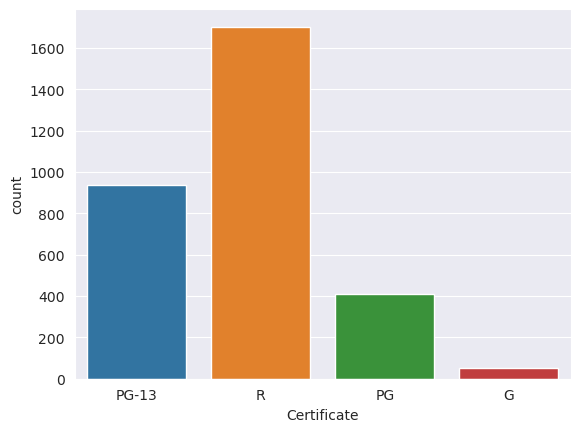

In [39]:
sns.countplot(x = df["Certificate"])

Sau khi gom nhóm các nhãn phim, cột `Certificate` còn lại 4 giá trị. Tuy số lượng giá trị `"G"` khá thấp nhưng nhóm vẫn quyết định giữ lại các dòng này

## Mã hóa các giá trị của các cột đánh giá  `"Nudity"`, `"Violence"`, `"Profanity"`, `"Alcohol"`, `"Frightening"`

Như đã xử lí ở trên, các cột đánh giá sẽ có 4 mức độ:

- `None`: Hầu như không có

- `Mild`: Nhẹ

- `Moderate`: Vừa phải

- `Severe`: Nặng

Nhóm sẽ chuyển các cột này thành kiểu int với cách mã hóa như sau: 

- `None`: 1

- `Mild`: 2

- `Moderate`: 3

- `Severe`: 4

In [40]:
encode = {
    "None": 1,
    "Mild": 2,
    "Moderate": 3,
    "Severe": 4
}

df["Nudity"] = df["Nudity"].map(encode)
df["Violence"] = df["Violence"].map(encode)
df["Profanity"] = df["Profanity"].map(encode)
df["Alcohol"] = df["Alcohol"].map(encode)
df["Frightening"] = df["Frightening"].map(encode)

In [41]:
df

,Name,Date,Rate,Votes,Genre,Duration,Certificate,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163,"Action, Adventure, Thriller",163,PG-13,2,3,2,2,3
1,The Guilty,2021,6.3,64375,"Crime, Drama, Thriller",90,R,1,1,4,1,3
2,The Many Saints of Newark,2021,6.4,27145,"Crime, Drama",120,R,3,4,4,3,3
3,Venom: Let There Be Carnage,2021,6.4,30443,"Action, Adventure, Sci-Fi",97,PG-13,1,3,3,2,3
4,Dune,2021,8.3,84636,"Action, Adventure, Drama",155,PG-13,1,3,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
5021,Chugyeokja,2008,7.8,62423,"Action, Crime, Thriller",125,R,2,4,3,2,4
5023,The Human Centipede II (Full Sequence),2011,3.8,37492,Horror,91,R,4,4,4,2,4
5025,Before the Devil Knows You're Dead,2007,7.3,100668,"Crime, Drama, Thriller",117,R,4,3,4,4,4
5026,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100,PG-13,1,1,2,3,1


Sau khi tiền xử lí, dữ liệu coàn 3105 dòng và 12 cột. Nhóm sẽ sử dụng dữ liệu này để phân tích và trực quan hóa

In [42]:
df.to_csv("../data/imdb_clean.csv", index = False)

# Data Exploring

## Khám phá dữ liệu trong từng cột

In [43]:
df = pd.read_csv("../data/imdb_clean.csv")
df.head()

,Name,Date,Rate,Votes,Genre,Duration,Certificate,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163,"Action, Adventure, Thriller",163,PG-13,2,3,2,2,3
1,The Guilty,2021,6.3,64375,"Crime, Drama, Thriller",90,R,1,1,4,1,3
2,The Many Saints of Newark,2021,6.4,27145,"Crime, Drama",120,R,3,4,4,3,3
3,Venom: Let There Be Carnage,2021,6.4,30443,"Action, Adventure, Sci-Fi",97,PG-13,1,3,3,2,3
4,Dune,2021,8.3,84636,"Action, Adventure, Drama",155,PG-13,1,3,1,2,3


### Cột `Date`

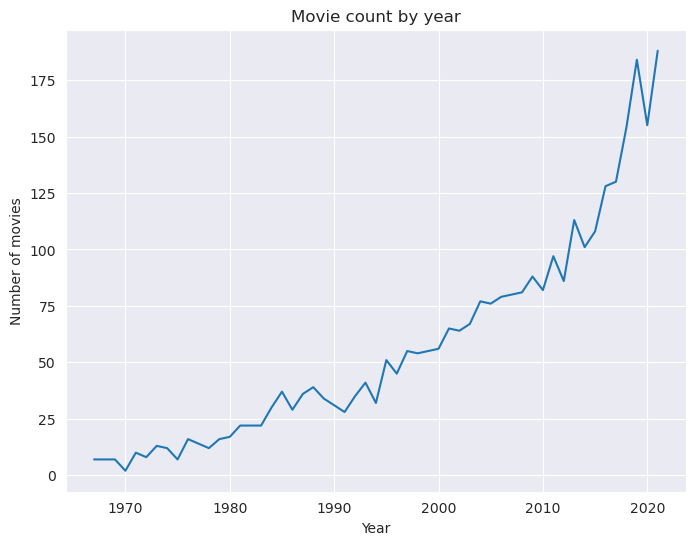

In [44]:
df_date = df.groupby('Date').size().reset_index(name='Count')
plt.figure(figsize=(8,6))
plt.plot(df_date['Date'], df_date['Count'])
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Movie count by year')
plt.show()

- Dựa trên biểu đồ phân bố số lượng phim sản xuất theo năm, chúng ta có thể thấy rằng số lượng phim sản xuất trong các năm gần đây tăng lên đáng kể, đặc biệt là trong khoảng thời gian từ năm 2000 trở đi. Trong khi đó, số lượng phim sản xuất trong các năm trước đó tương đối thấp.

- Ngoài ra, chúng ta cũng có thể nhận thấy một sự tăng trưởng nhanh chóng của ngành công nghiệp điện ảnh trong thế kỷ 21, có thể là do sự phát triển của công nghệ và việc phổ biến của các phương tiện truyền thông, giúp các bộ phim được tiếp cận và quảng bá tốt hơn.

### Cột `Duaration`

Text(0.5, 1.0, 'Distribution of movie duration')

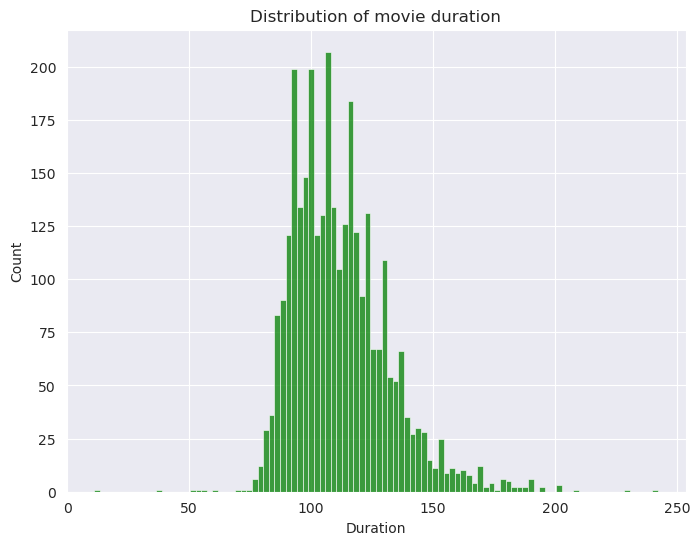

In [45]:
# Code here (hisplot)
fig = plt.figure(figsize=(8, 6))
sns.histplot(df['Duration'], bins = 100, color="green")
plt.title("Distribution of movie duration")

- Dựa trên biểu đồ phân bố thời lượng phim sản xuất, chúng ta có thể thấy rằng phần lớn các bộ phim có thời lượng trong khoảng từ 80 đến 140 phút. Có một số bộ phim rất dài (từ 180 đến 400 phút) nhưng chúng khá hiếm trong số các bộ phim được sản xuất. Điều này cho thấy rằng, trong ngành công nghiệp điện ảnh, thời lượng phim không thể quá ngắn hoặc quá dài để có thể thu hút được sự chú ý của khán giả.

### Cột `Votes`

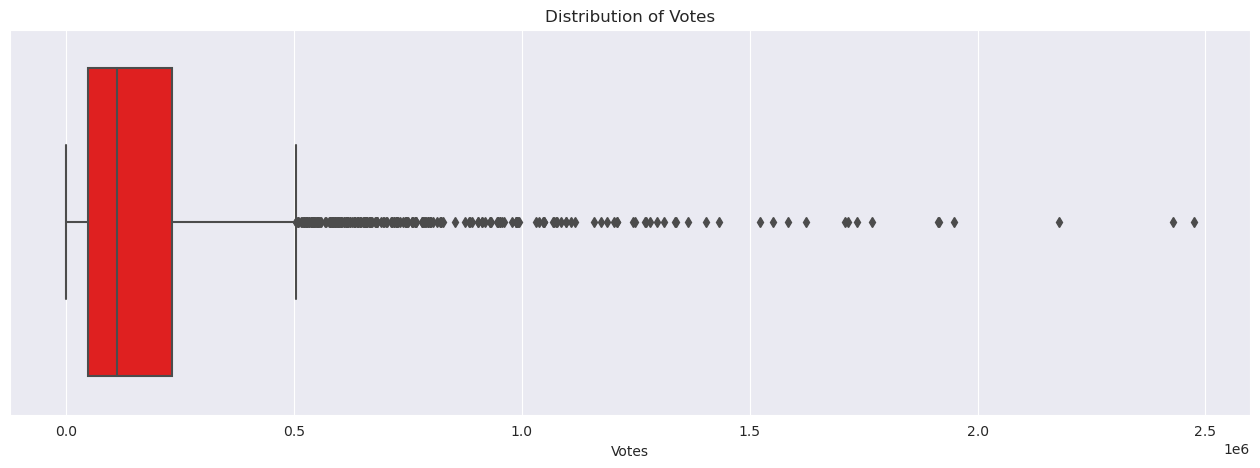

In [46]:
# Code here (hisplot) Ở trên xài hist rồi thì có thể xài boxplot ở đây
import seaborn as sns

plt.figure(figsize=(16,5))
sns.boxplot(x=df["Votes"], color="red")
plt.title("Distribution of Votes")
plt.xlabel("Votes")
plt.show()


Dựa trên biểu đồ, ta có thể thấy rằng:

- Số phiếu bầu của các bộ phim phân bố rộng, từ khoảng 50 đến hơn 2 triệu phiếu bầu.

- Có rất nhiều outlier (những điểm dữ liệu nằm ngoài whiskers) trên đồ thị, cho thấy rằng có rất nhiều bộ phim đã thu hút được sự chú ý của một lượng lớn khán giả.

- Boxplot cũng cho thấy rằng trung vị (median) của số phiếu bầu cho các bộ phim rơi vào khoảng từ 5.000 đến 50.000 phiếu bầu.

- Sự phân bố của số phiếu bầu có xu hướng bị lệch phải, có nghĩa là có nhiều bộ phim đã nhận được số phiếu bầu cao hơn so với trung bình.

### Cột `Rate`

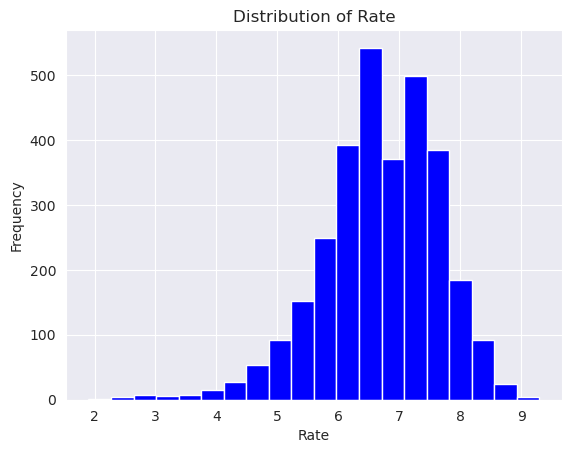

In [47]:
# Code here (chưa biết dùng gì nên dùng 2 cách)
plt.hist(df["Rate"], bins=20, color="blue")
plt.title("Distribution of Rate")
plt.xlabel("Rate")
plt.ylabel("Frequency")
plt.show()

Theo biểu đồ histogram, ta thấy phân bố đánh giá phim trên IMDb khá lệch về phía trung bình trên thang điểm 0-10, với đa số phim đạt điểm đánh giá từ 6 đến 8.

In [48]:
print(df['Rate'].describe())

count    3105.000000
mean        6.693655
std         0.961984
min         1.900000
25%         6.100000
50%         6.800000
75%         7.400000
max         9.300000
Name: Rate, dtype: float64


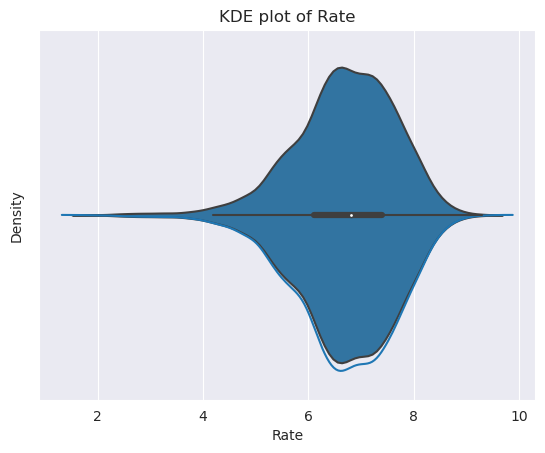

In [49]:
sns.kdeplot(data=df, x="Rate")
sns.violinplot(x=df["Rate"], inner="box")
plt.title("KDE plot of Rate")
plt.xlabel("Rate")
plt.show()

Biểu đồ KDE (Kernel Density Estimate) cũng cho thấy phân bố tương tự, với đỉnh đạt tại khoảng 7.0. Kết hợp với boxplot, ta thấy trung vị (median) của cột "Rate" là khoảng 6.8. Ta có thể thấy rằng phần lớn các phim trong bộ dữ liệu này được đánh giá từ trung bình đến cao trên IMDb.

### Cột `Certificate`

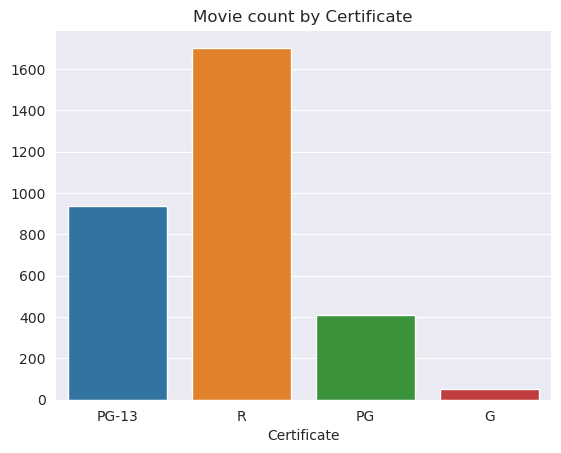

In [50]:
# Code here (countplot)
sns.countplot(x = df["Certificate"])
plt.ylabel("")
plt.title("Movie count by Certificate");


### Cột `Nudity`, `Violence`, `Profanity`, `Alcohol`, `Frightening`

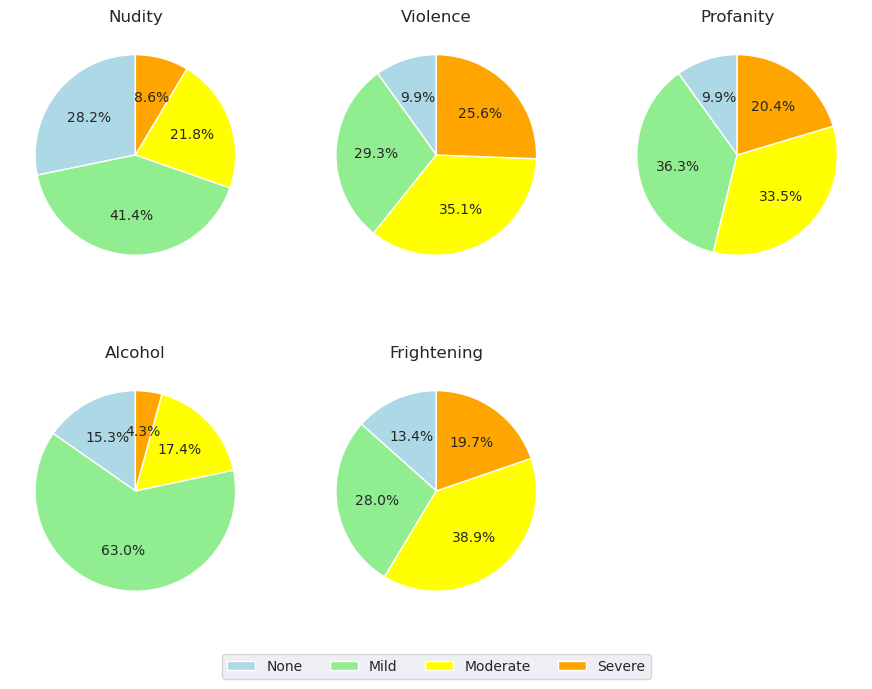

In [51]:
fig, axes = plt.subplots(2, 3, figsize=(11, 8))

colors = ["lightblue", "lightgreen", "yellow", "orange"]
labels = ["None", "Mild", "Moderate", "Severe"]

for col, ax in zip(df.columns[7:12], axes.flatten()):
    data = df[[col]].value_counts().sort_index()
    ax.pie(data, colors = colors, autopct='%1.1f%%', startangle=90)
    ax.set_title(col)

axes[1, 1].legend(labels, loc="center", bbox_to_anchor=(0.5, -0.2), ncol=4)
fig.delaxes(axes[1, 2])

- Các phim có cảnh nóng ở mức nhẹ hoặc không có, nếu có thì đa số ở mức độ vừa phải

- Đa số phim có cảnh bạo lực (violence):
    
    - Số lượng phim có cảnh bạo lực nhẹ và vừa phải (Mild và Moderate) chiếm đa số, với khoảng 30 và 35% các phim trong dữ liệu có mức độ này.
    
    - Số lượng phim không có cảnh bạo lực (mức độ None) chiếm khoảng 10%.

- Tương tự các cảnh bạo lực, đa số các phim cũng chứa các cảnh chửi rủa (Profanity) ở mức độ nhẹ và vừa phải, chiểm lần lượt 33% và 36%

- Số lượng phim có cảnh có liên quan tới rượu bia (alcohol) nhẹ (mức độ Mild) và chiếm tỉ trọng nhất khoảng 63%. Các mức độ còn lại chiếm dưới 18% và khá ít phim chứa các cảnh liên quan tới rượu bia ở mức độ nặng (severe) chỉ khoảng 4%.

- Các cảnh gây sợ hãi (frightening) xuất hiện trong các phim ở mức độ khá tương tự với các cảnh bạo lực và chửi rủa.

### Cột `Genre`

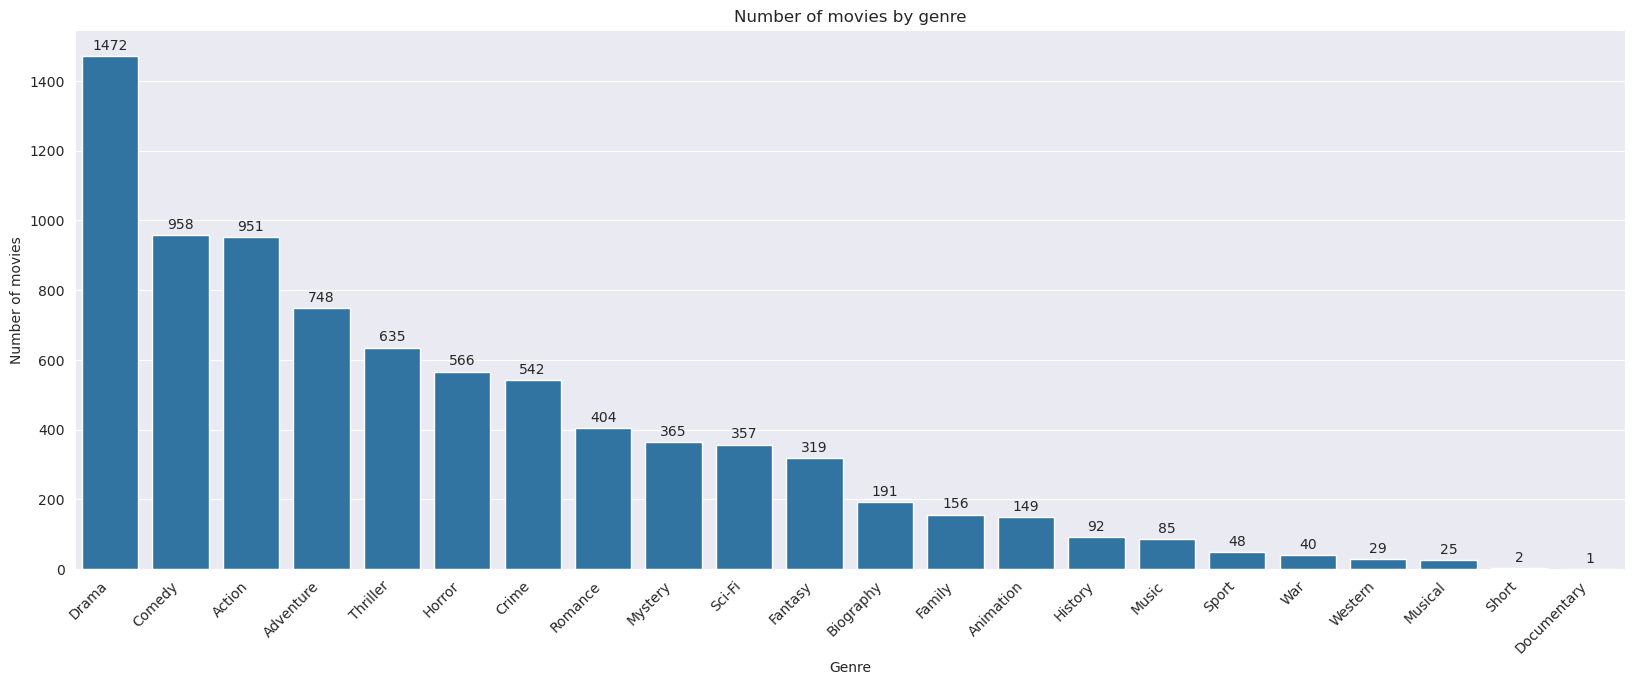

In [52]:
genres = pd.Series(list(set(np.concatenate(df["Genre"].str.split(", ").values))))
genres_count = genres.apply(lambda x: df[df["Genre"].str.contains(x)]["Name"].count())

plt.figure(figsize=(20, 7))
ax = sns.barplot(data = pd.DataFrame({"Genre": genres, "Count": genres_count}).sort_values("Count", ascending=False), x = "Genre", y = "Count", color = "C0")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

for p in ax.patches:
    ax.annotate(f'{p.get_height():0.0f}', (p.get_x() + 0.4 , p.get_height() + 30), va = "center", ha = "center")

ax.set_title("Number of movies by genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Number of movies");

Các thể loại phim có phân bố không đồng đều, phần lớn phim được xếp vào các thể loại `"Drama"`, `"Comedy"`, `"Action"`, `"Adventure"`. Một số thể loại khác có ít phim là `"Sport"`, `"War"`, `"Western"`, `"Musical"`, `"Short"`, `"Documentary"`. Đặc biệt thể loại `"Documentary"` chỉ có 1 phim duy nhất

## Mối quan hệ giữa các cột với nhau

### `Rate` và `Date`

<AxesSubplot: title={'center': 'Average Rate by Year'}, xlabel='Date', ylabel='Rate'>

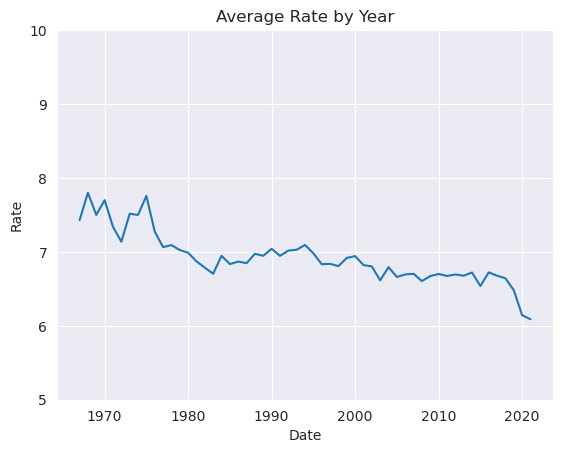

In [53]:
df.groupby("Date")["Rate"].mean().plot(ylabel="Rate", title="Average Rate by Year",ylim=(5,10))

- Điểm đánh giá trung bình các phim có xu hướng giảm xuống theo thời gian.

- Lí do có thể là tiêu chí đánh giá phim ngày một khắt khe hơn, người xem đang ngày một khó tính hơn, hoặc ngày càng có nhiều phim được sản xuất với chất lượng được đánh giá thấp.

- Điểm đánh giá trung bình cho từng nhãn phim sẽ được làm rõ hơn ở phần 3.2.5.

### `Rate` và `Votes`

Text(0.5, 1.0, 'Relationship between Votes vs Rate')

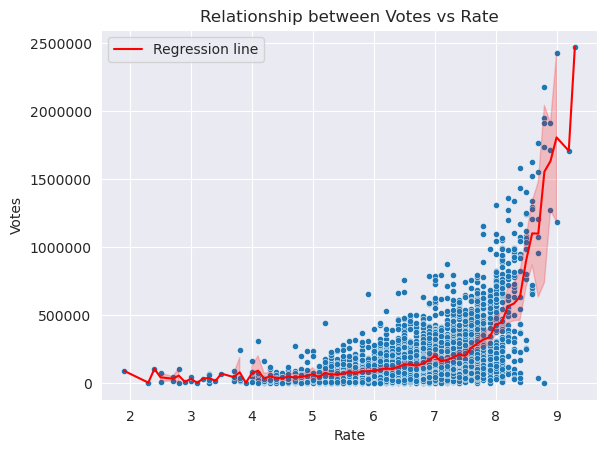

In [54]:
sns.scatterplot(x="Rate",y="Votes", data=df,s=20)
sns.lineplot(x="Rate",y="Votes", data=df, color="red", label = "Regression line").ticklabel_format(style='plain', axis='y')
plt.title("Relationship between Votes vs Rate")

- Những phim đạt điểm cao đến rất cao có rất nhiều lượng bình chọn, chứng tỏ rằng phim đó thực sự là bộ phim hay và rất được lòng đại chúng.

- Những phim có điểm thấp và trung bình thấp được ít lượt bình chọn hơn rõ rệt, cho thấy khán khả không mặn mà với những phim được đánh giá không cao, phần lớn chỉ xem và không đưa ra lượt đánh giá nào.

### `Rate` và `Duration`

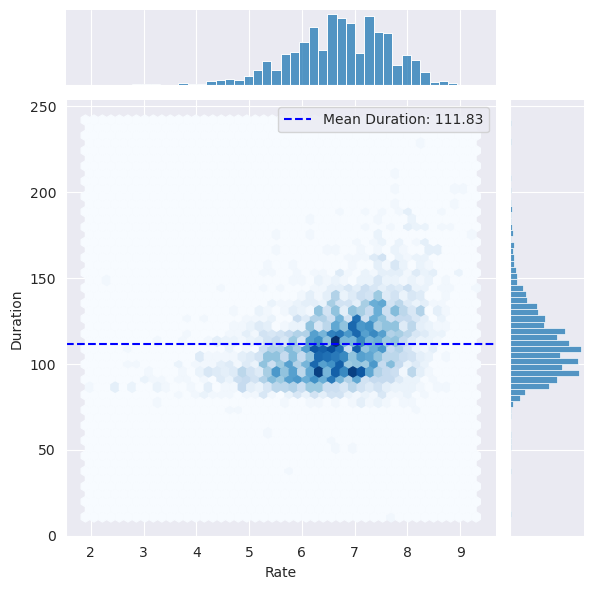

In [55]:
ax=sns.jointplot(x="Rate",y="Duration", data=df, kind="hex", cmap="Blues")
mean_duration=df["Duration"].mean()

ax.ax_joint.axhline(mean_duration, color='blue', linestyle='--', label=f"Mean Duration: {mean_duration:.2f}")
ax.ax_joint.legend()

- Phần lớn phim được sản xuất có thời lượng từ `90 phút` đến dưới `150 phút` (trung bình tổng thể là khoảng `111 phút`), ở mức thời lượng này có mức đánh giá khá từ `6.0` đến `7.0`. Có lẽ khoảng thời lượng này là thời lượng hợp lí, không quá dài dòng và đủ để truyền tải được thông điệp cho khán giả.

- Một số phim có thời lượng lớn hơn (từ trên `150 phút`) có điểm đánh giá cũng cao hơn mức trung bình (ở mức `7.0` đến `9.0`) tuy nhiên số lượng là không nhiều .

### `Rate` và `Certificate`

Text(0.5, 1.0, 'Average Rate by Certificate')

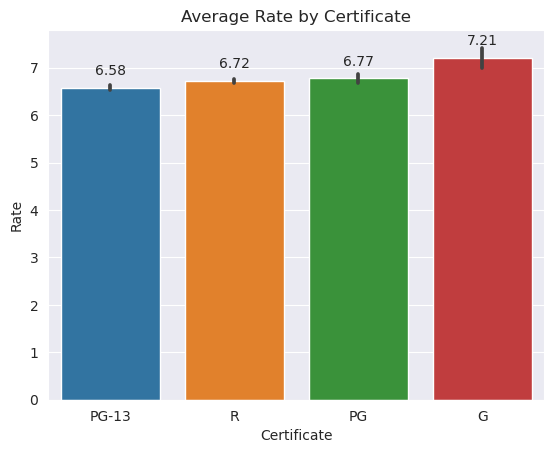

In [56]:
ax=sns.barplot(data=df,x="Certificate",y="Rate")
ax.bar_label(ax.containers[0], fmt="%.2f", label_type="edge",padding=7)
ax.set_title("Average Rate by Certificate")

- Điểm đánh giá trung bình của các thể loại phim chênh lệch nhau không nhiều. Các phim nhãn PG-13, R và PG có điểm đánh giá trung bình gần như ngang nhau, riêng phim có nhãn R có điểm trung bình cao hơn một chút (khoảng 7.21 điểm)

### `Rate`, `Date` và `Certificate`

Text(0.5, 0, '')

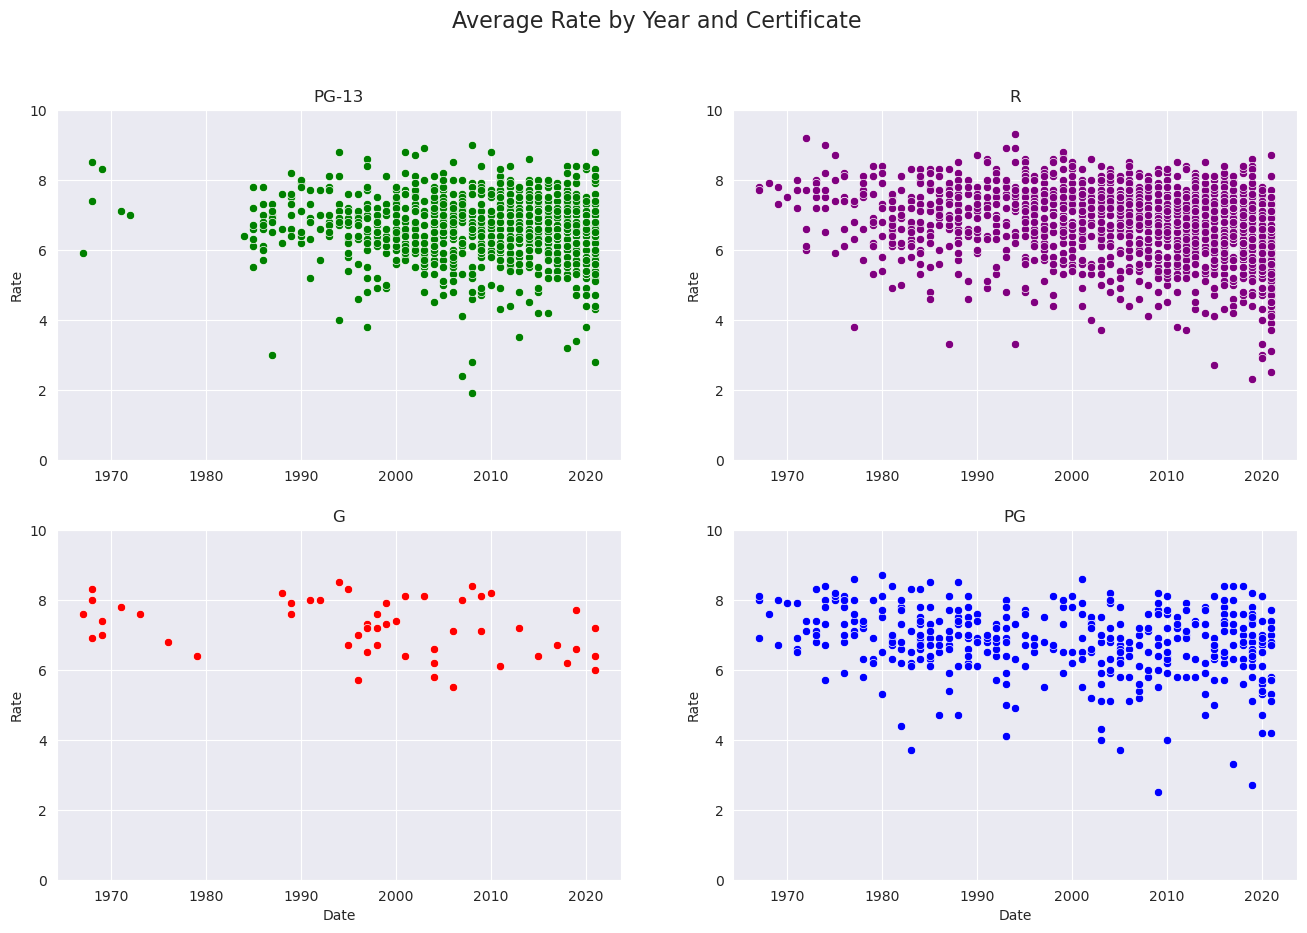

In [93]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Average Rate by Year and Certificate', fontsize=16)

sns.scatterplot(x="Date",y="Rate", data=df[df["Certificate"]=="PG-13"], ax=axes[0,0],color="green")
sns.scatterplot(x="Date",y="Rate", data=df[df["Certificate"]=="R"], ax=axes[0,1],color="purple")
sns.scatterplot(x="Date",y="Rate", data=df[df["Certificate"]=="G"], ax=axes[1,0],color="red")
sns.scatterplot(x="Date",y="Rate", data=df[df["Certificate"]=="PG"], ax=axes[1,1],color="blue")

axes[0,0].set_title("PG-13")
axes[0,1].set_title("R")
axes[1,0].set_title("G")
axes[1,1].set_title("PG")

axes[0,0].set_ylim(0,10)
axes[0,1].set_ylim(0,10)
axes[1,0].set_ylim(0,10)
axes[1,1].set_ylim(0,10)

axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')


- Biểu đồ phân bố điểm đánh giá của từng phim theo các năm, được chia thành 4 loại nhãn (`PG-13`, `R`, `G`, `PG`).

- Dễ dàng nhận thấy số lượng phim `PG-13` (không khuyến khích cho trẻ dưới 13 tuổi) và phim `R` (không khuyến khích cho trẻ dưới 17 tuổi) có số lượng nhiều hơn hẳn so với các phim có nhãn `G` (dành cho mọi lứa tuổi) và `PG` (cân nhắc cho trẻ em). Cho thấy trẻ em ít được các nhà làm phim nhắm tới là đối tượng dành cho phim của mình.

- Nhìn vào biểu đồ của 2 nhãn phim phổ biến là `PG-13` và `R`, ta thấy càng về những năm gần đây, sự phân bố phim theo trục tung (điểm đánh giá) đang có xu hướng đồng đều và trải rộng ra hơn và số phim có điểm đánh giá cao vẫn duy trì ổn định. Có nghĩa là số luọng phim tăng theo các năm dẫn đến số lượng các phim đạt điểm thấp cũng tăng theo, làm điểm trung bình của các bộ phim trong năm đó bị giảm xuống, điều này cũng giải thích cho biểu đồ ở phần 3.1.

Text(0.5, 1.0, 'Average Rate by Year and Certificate')

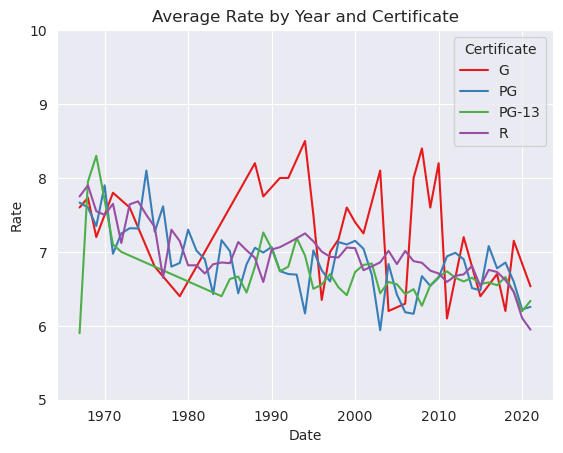

In [58]:
ax=sns.lineplot(x="Date",y="Rate",data=df.groupby(["Date","Certificate"])["Rate"].mean().to_frame(),hue="Certificate",palette="Set1")
ax.set_ylim(5,10)
ax.set_title("Average Rate by Year and Certificate")

- Điểm đánh giá trung bình của phim nhãn `G` không ổn định, một phần lí do có lẽ vì số lượng quá ít.

- Điểm trung bình của 3 loại nhãn còn lại có xu hướng giảm dần theo thời gian.

### `Date`, `Rate` và `Votes`

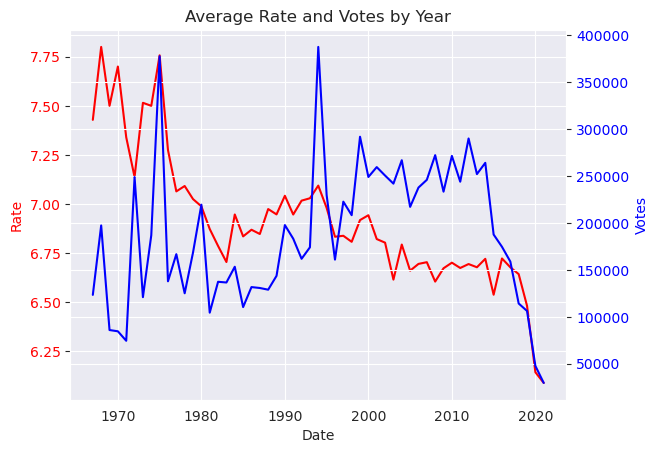

In [59]:
fig, ax1 = plt.subplots()

df1=df.groupby("Date")["Rate"].mean().to_frame()
df2=df.groupby("Date")["Votes"].mean().to_frame()

ax1=sns.lineplot(x="Date",y="Rate", data=df1, color="red", ax=ax1)
ax1.set_ylabel('Rate', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_title("Average Rate and Votes by Year")

ax2=ax1.twinx()
ax2=sns.lineplot(x="Date",y="Votes", data=df2, color="blue", ax=ax2)
ax2.set_ylabel('Votes', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')


- Như đã nói trên, điểm đánh giá đang có xu hướng giảm, ngược lại là số lượng bình chọn thì lại có xu hướng tăng.

- Tuy nhiên những năm gần đây cho thấy sự tụt giảm về cả điểm đánh giá và lượt bình chọn, đó là khoảng thời gian từ Covid-19 đến nay cho thấy đại dịch đã ảnh hưởng không nhỏ đến ngành điện ảnh.

### `Date`, `Rate` và `Duration`

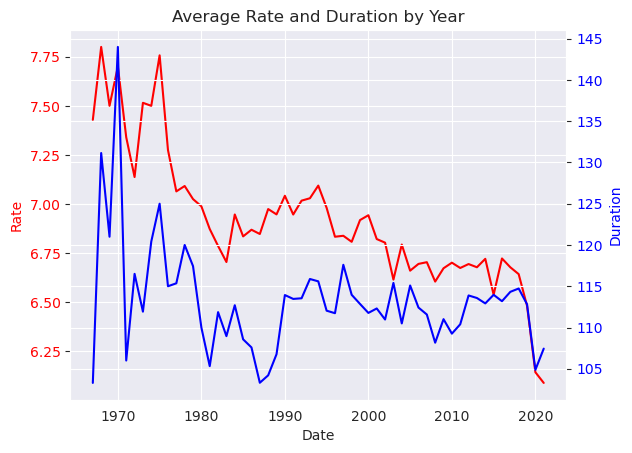

In [60]:
fig, ax1 = plt.subplots()

df1=df.groupby("Date")["Rate"].mean().to_frame()
df2=df.groupby("Date")["Duration"].mean().to_frame()

ax1=sns.lineplot(x="Date",y="Rate", data=df1, color="red", ax=ax1)
ax1.set_ylabel('Rate', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_title("Average Rate and Duration by Year")

ax2=ax1.twinx()
ax2=sns.lineplot(x="Date",y="Duration", data=df2, color="blue", ax=ax2)
ax2.set_ylabel('Duration', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')


- Biểu đồ diễn tả mối liên hệ giữa điểm đánh giá trung bình và thời lượng trung bình qua các năm.

- Hai đường này có xu hướng khá giống nhau, có thể nói có sự tương quan với nhau. Từ đó nhóm có nhận xét thời lượng phim có ảnh hưởng đến điểm đánh giá của phim.

### `Genre` với `Votes` và `Rate`

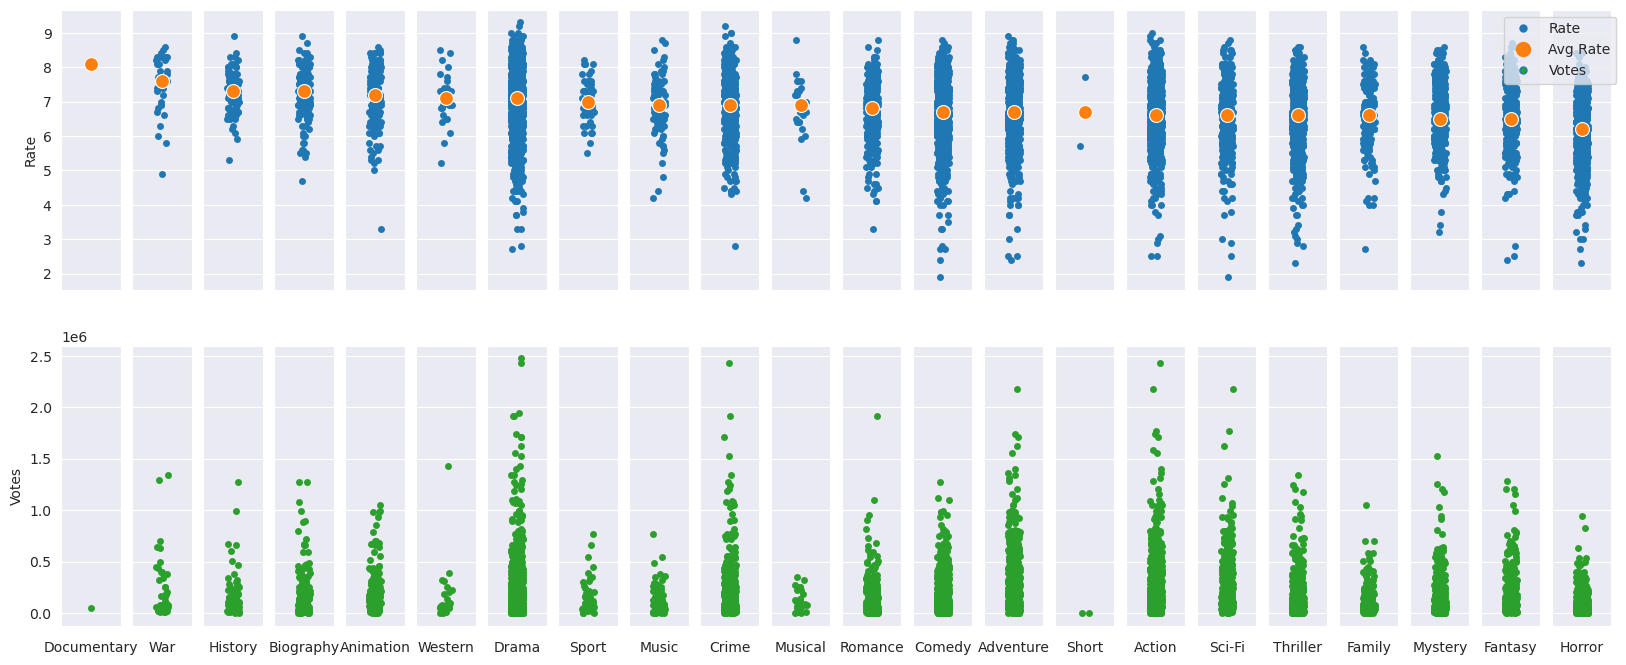

In [61]:
genres_agg = pd.DataFrame(
    {"Genre": genres, 
     "rate_median": genres.apply(lambda x: df[df["Genre"].str.contains(x)]["Rate"].median()),
     "vote_median": genres.apply(lambda x: df[df["Genre"].str.contains(x)]["Votes"].median()),
    }
).sort_values("rate_median", ascending = False).set_index("Genre")

order = genres_agg.index

fig, axes = plt.subplots(ncols = genres.shape[0], nrows = 2, figsize = (20, 8), sharey = "row", sharex = True)

for ax, genre in zip(axes[0], order):
    sns.stripplot(y = df[df["Genre"].str.contains(genre)]["Rate"], ax = ax)
    sns.scatterplot(x = [0], y = genres_agg.loc[genre, "rate_median"], color = "C1", ax = ax, s = 100, zorder = 10)
    ax.set_ylabel("")
    ax.set_xlim(-0.5, 0.5)

for ax, genre in zip(axes[1], order):
    # sns.barplot(x = [0], y = [genres_agg.loc[genre, "vote_median"]], color = "C0", ax = ax)
    sns.stripplot(y = df[df["Genre"].str.contains(genre)]["Votes"], ax = ax, color = "C2")
    ax.set_xticklabels([])
    ax.set_xlabel(genre)

axes[0, -1].legend(
    handles = [
        Line2D([0], [0], marker='o', lw = 0, label='Rate', markerfacecolor='C0', markersize=5),
        Line2D([0], [0], marker='o', lw = 0, label='Avg Rate', markerfacecolor='C1', markeredgecolor='C1', markersize=10),
        Line2D([0], [0], marker='o', lw = 0, label='Votes', markerfacecolor='C2', markersize=5),
    ],
    loc = "upper right", bbox_to_anchor = (1.2, 1)
)

# for ax in axes[1]:
#     #annnotate the median vote
#     ax.annotate(f'{genres_agg.loc[ax.get_xlabel(), "vote_median"]:0.0f}', (0, genres_agg.loc[ax.get_xlabel(), "vote_median"] + 10000), ha = "center")

# axes[1, 1].set_ylim(0, 320000)
axes[0, 0].set_ylabel("Rate")
axes[1, 0].set_ylabel("Votes");

- Các thể loại có ít phim có phân bố điểm nhìn chung nhỉnh hơn các thể loại có nhiều phim. 

- Nhìn vào số lượng vote và số lượng phim, các thể loại có số lượng ít như `"Documentary"`, `"Western"`, `"Sport"`, `"Musical"` hay `"Sport"` có ít lượng votes hơn, có thể do nhận được ít sự quan tâm hơn, do đó ít nhà sản xuất hơn, các nhà sản xuất đầu tư chỉn chu hơn vào bộ phim.

- Còn đối với các thể loại có số lượng nhiều hơn như `"Crime"`, `"Drama"`, `"Adventure"`, `"Comedy"` có số lượng votes nhiều hơn, nghĩa là có nhiều sự quan tâm hơn, đồng nghĩa với với việc sẽ có nhiều nhà sản xuất các thể loại phim này. Khi số lượng nhà xuất suất tăng lên, chất lượng phim cũng sẽ dàn trải hơn, do đó ta thấy phân bố điểm của các thể loại này trải rộng hơn về phía dưới.

- Tuy nhiên nhận xét trên chỉ là giả thuyết của nhóm, còn khá nhiều yếu tố khác ảnh hưởng đến điểm của từng thể loại phim.


### `Genre` và `Certificate`

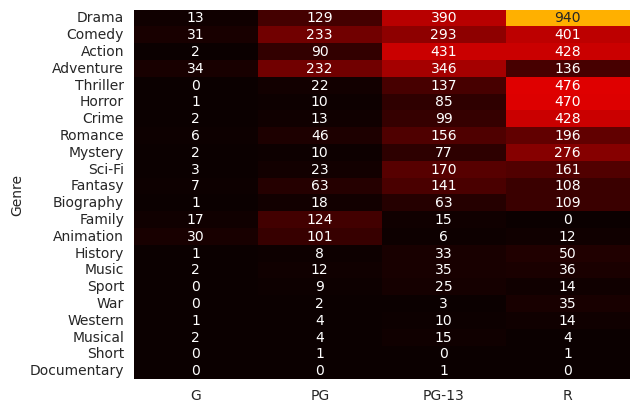

In [87]:
data = genres.apply(lambda x: df[df["Genre"].str.contains(x)]["Certificate"].value_counts()).fillna(0)
data["Genre"] = genres

data.set_index("Genre", inplace = True)

data["sum"] = data.sum(axis = 1)
data.sort_values("sum", ascending = False, inplace = True)

data = data[["G", "PG", "PG-13", "R"]]

sns.heatmap(data, cmap = "hot", annot = True, fmt = "0.0f", cbar = False, vmax = 1500);

Đa số các thể loại phim có phân bố ở các nhãn tăng dần theo hướng G -> PG -> PG-13 -> R (màu sáng dần từ trái sang phải), nghĩa là đa số đối tượng khán giả của đa số thể loại phim thuộc nhóm thanh thiếu niên trên 13/người lớn, như các thể loại `"Drama"`, `"Thriller"`, `"Horror"`. Một số thể loại có mức tập trung khác thường ở nhãn PG và PG-13 là `"Comedy"` và `"Adventure"`. Riêng 2 thể loại `"Animation"` và `"Family"` có đối tượng khán giả chính là trẻ em khi phần lớn phim có nhãn PG

### `Genre` và `Date`

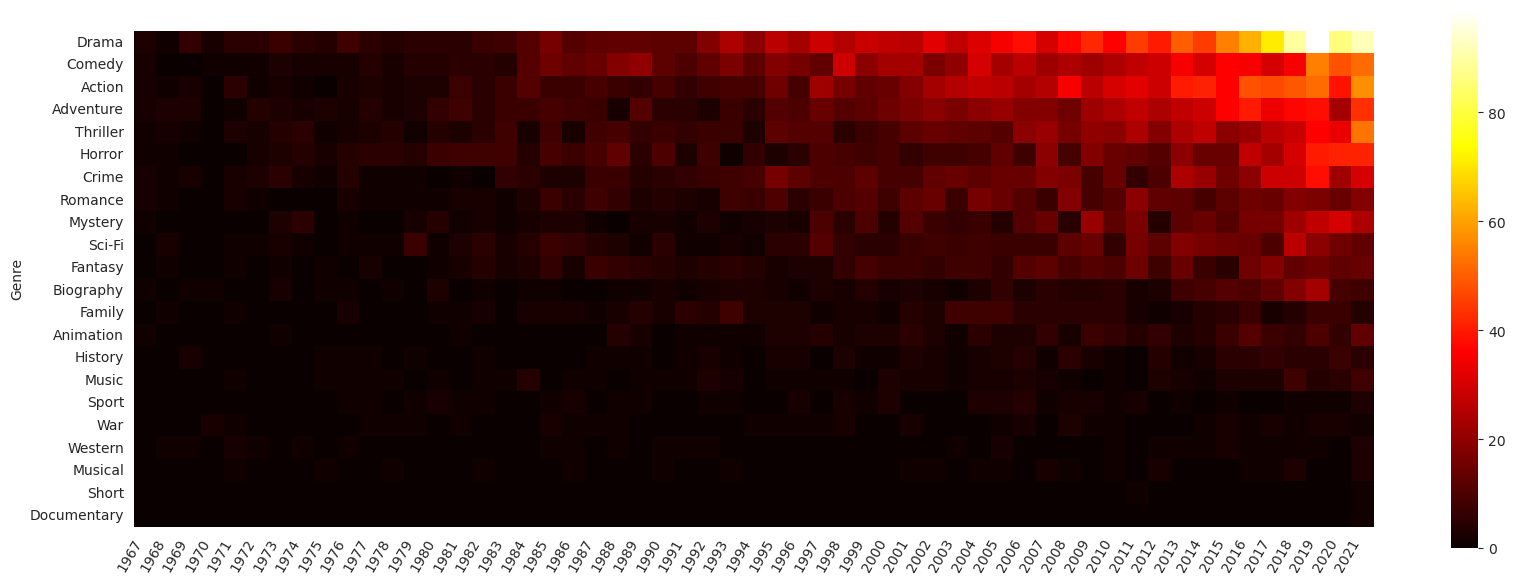

In [92]:
plt.figure(figsize=(20, 7))

data = genres.apply(lambda x: df[df["Genre"].str.contains(x)]["Date"].value_counts()).fillna(0)
data["Genre"] = genres

data.set_index("Genre", inplace = True)

data["sum"] = data.sum(axis = 1)
data.sort_values("sum", ascending = False, inplace = True)
        
data = data[list(range(1967, 2022))]

ax = sns.heatmap(data, cmap = "hot")
ax.set_aspect("equal")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60, ha = "right");

- Số lượng phim có xu hướng tăng dần theo thời gian ở đều các thể loại. Các thể loại xuất hiện từ sớm và đồng thời chiếm số lượng nhiều ở những năm gần đây là `"Drama"`, `"Action"`, `"Adventure"`, `"Horror"` và một số thể loại khác. 

- Giai đoạn 1985 - 1995 các thể loại `"Action"` `"Adventure"` và một số thể loại gần kề khác trên heatmap có sự phân bố khá thát thường, thay đổi lên xuống liên tục.

- Thể loại `"Family"` có những giai đoạn phát triển nhẹ trong quá khứ 1991 - 1993, 2003 - 2005, sau đó lụi tàn cho đến ngày nay.

- Các phim thể loại `"Comedy"` xuất hiện nhiều giai đoạn 1983 - 1990, sau đó thay đổi khá thất thường tới 1998 và tăng trưởng dần đều đến ngày nay.

### Các cột `Nudity`, `Violence`, `Alcohol`, `Profanity`, `Frightening`

In [64]:
sum = []
for i in range(len(df)):
    sum.append(df.Nudity[i] +df.Violence[i]  +df.Profanity[i]  +df.Alcohol[i]  +df.Frightening[i])

In [65]:
df.insert(loc = 12, column = 'Sum', value = sum)

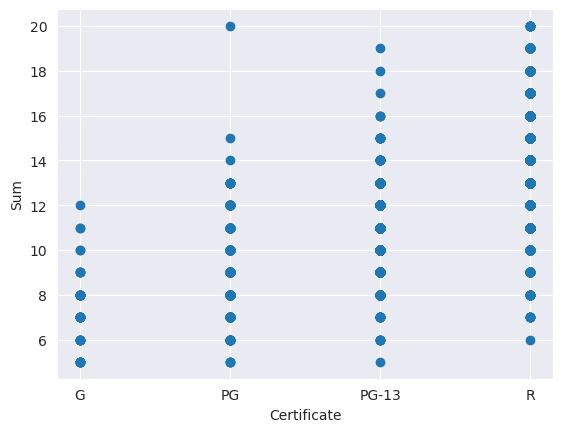

In [66]:
import pandas as pd
import matplotlib.pyplot as plt


# Define a custom order for the x-axis elements
custom_order = ['G', 'PG', 'PG-13', 'R']

# Convert the x-axis column to a categorical data type with the custom order as its categories
df['Certificate'] = pd.Categorical(df['Certificate'], categories=custom_order)

# Sort the data based on the categorical x-axis column
sorted_data = df.sort_values('Certificate')

# Create a scatter plot of the sorted data
plt.scatter(sorted_data['Certificate'], sorted_data['Sum'])
plt.xlabel('Certificate')
plt.ylabel('Sum')
plt.show()


Tổng các giá trị Nudity, Violence, Profanity, Alcohol, Frightening của một phim càng cao thì khả năng nhận phân loại Certificate ở các mức cao (ví dụ R) sẽ nhiều hơn.

Text(0.5, 0.98, 'Sum of Certificate by Date')

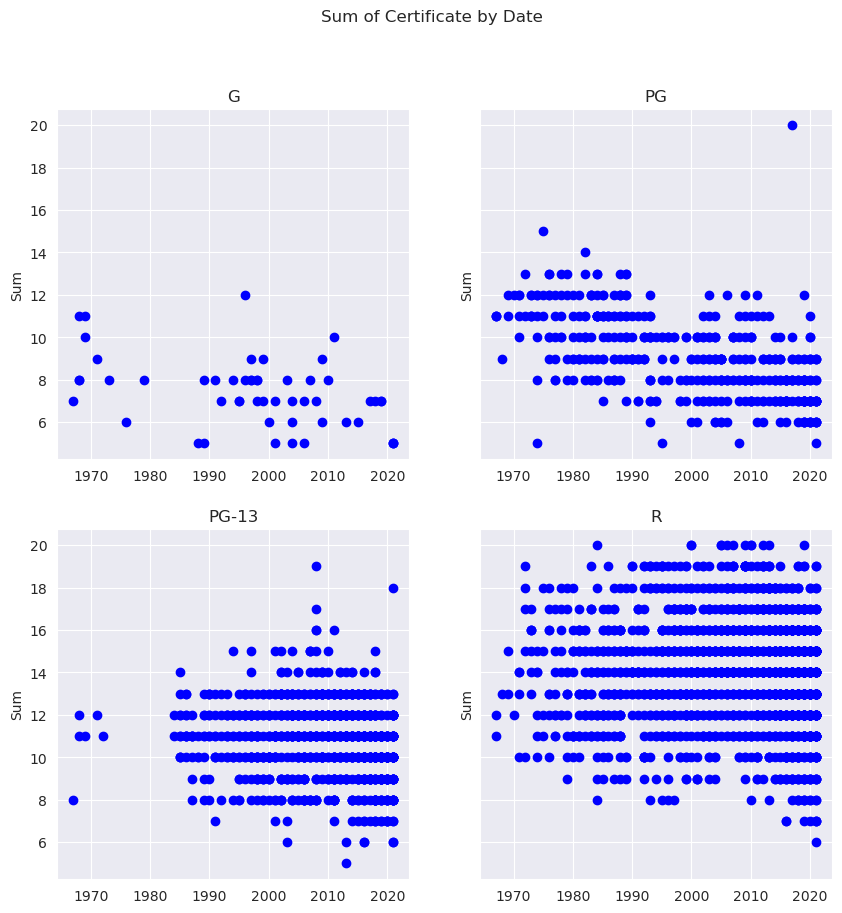

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharey=True)

col = ['G', 'PG', 'PG-13', 'R']


for c, ax in zip(col, axes.flatten()):
    filtered_data = df[df['Certificate'] == c]
    ax.scatter(filtered_data['Date'], filtered_data['Sum'], color='blue', marker='o')
    ax.set_xlabel('')
    ax.set_ylabel('Sum')
    ax.set_title(c)

plt.suptitle('Sum of Certificate by Date')

Qua từng năm, phạm vi tổng điểm của Nudity, Violence, ... để đánh giá mức phân loại Certificate có xu hướng mở rộng ra (vừa cao hơn nhưng cũng có thể thấp điểm hơn). Nhãn R có xu hướng trải rộng nhất, nghĩa là có nhưng phim tuy các yếu tố giới hạn độ tuổi ở mức thấp nhưng vẫn chỉ dành cho khán giả trên 18 tuổi